<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/gh-pages/Copia_de_Seri_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [2]:
!pip install prophet

In [3]:
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd /content/gdrive/MyDrive/TS

/content/gdrive/MyDrive/TS


In [6]:
!ls

 BASEVERSION2.csv    data.csv
 BASEVERSION2.xlsx   data.gsheet
 BASE.xlsx	     page_views_barplot.png
'data (1).gsheet'    time.csv.csv
 data2.gsheet	    'TRABAJO DE TITULACION RAUL CALLE.docx'


In [60]:
# load the car sales dataset
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from fbprophet import Prophet
from pandas import to_datetime
# load data
from matplotlib import pyplot as plt
names = ['tipo-punto', 'agencia', 'fecha', 'egresos', 'ingresos', 'saldo']
df = read_excel('BASEVERSION2.xlsx', names=names)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())


(173983, 6)
  tipo-punto        agencia      fecha    egresos   ingresos      saldo
0    AGENCIA  12 DE OCTUBRE 2014-05-10 -100013.00  249353.00  149340.00
1    AGENCIA  12 DE OCTUBRE 2014-05-11        NaN  149340.00  149340.00
2    AGENCIA  12 DE OCTUBRE 2014-05-12 -106657.03  256226.91  149569.88
3    AGENCIA  12 DE OCTUBRE 2014-05-13 -118707.79  278541.61  159833.82
4    AGENCIA  12 DE OCTUBRE 2014-05-14 -137540.66  305361.03  167820.37


In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df.head()

,tipo-punto,agencia,fecha,egresos,ingresos,saldo
0,AGENCIA,12 DE OCTUBRE,2014-05-10,-100013.00,249353.00,149340.00
1,AGENCIA,12 DE OCTUBRE,2014-05-11,NaN,149340.00,149340.00
2,AGENCIA,12 DE OCTUBRE,2014-05-12,-106657.03,256226.91,149569.88
3,AGENCIA,12 DE OCTUBRE,2014-05-13,-118707.79,278541.61,159833.82
4,AGENCIA,12 DE OCTUBRE,2014-05-14,-137540.66,305361.03,167820.37


,egresos,ingresos,saldo
egresos,1.000000,-0.955779,-0.528414
ingresos,-0.955779,1.000000,0.722933
saldo,-0.528414,0.722933,1.000000


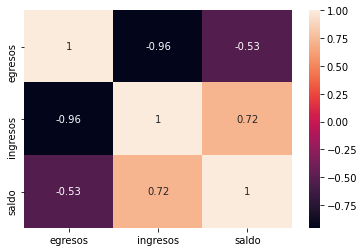

In [10]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

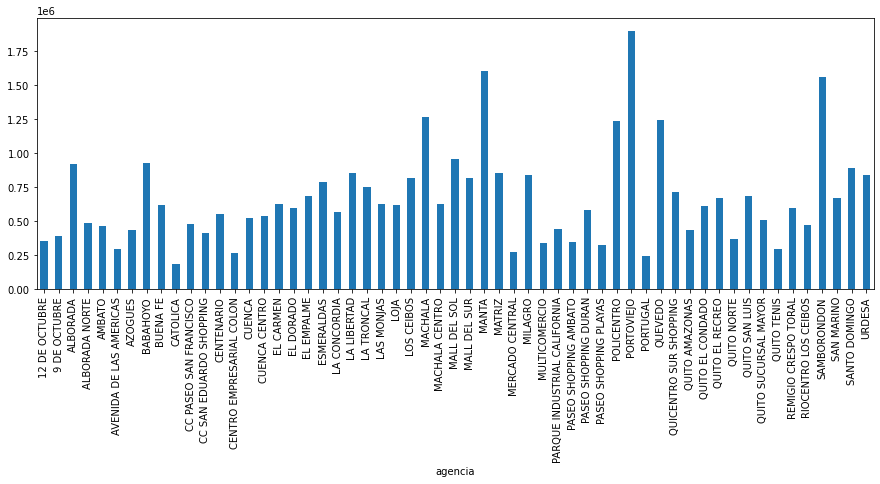

In [11]:
df.groupby(['agencia']).ingresos.mean().plot(kind='bar', stacked=True, figsize=(15, 5))

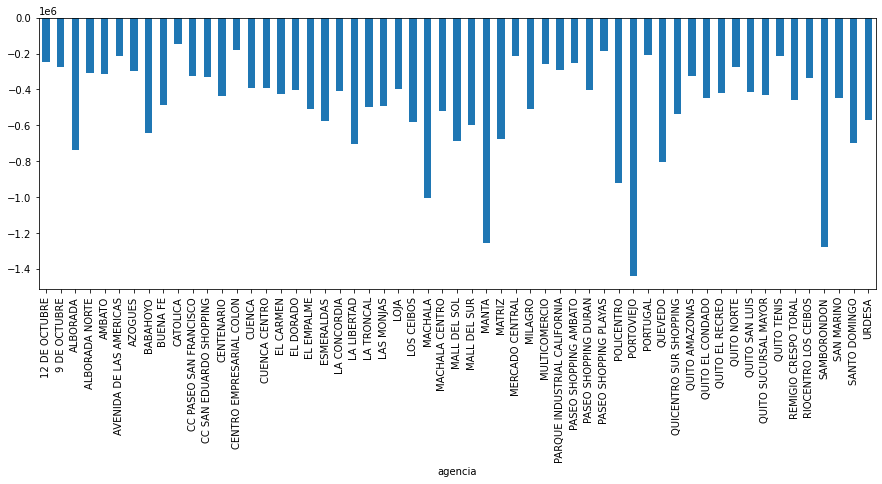

In [12]:
df.groupby(['agencia']).egresos.mean().plot(kind='bar', stacked=True, figsize=(15, 5))

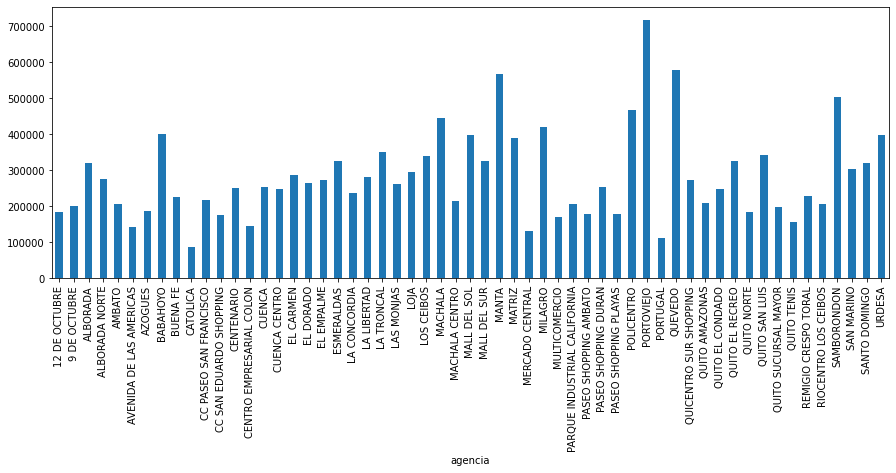

In [13]:
df.groupby(['agencia']).saldo.mean().plot(kind='bar', stacked=True, figsize=(15, 5))

In [61]:
def make_forecast( df,periods):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """


    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    

    # create a Prophet model from that data
    m = Prophet(yearly_seasonality=False,daily_seasonality=False)
    m.fit(df)
    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast





In [62]:
def make_forecast2( df,periods):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """


    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    

    # create a Prophet model from that data
    m = Prophet(yearly_seasonality=True,daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

2.161609700124245e-05
H1  La muestra no sigue una distribución normal
stat=-5.141, p=0.000
Probably Stationary
stat=3.866, p=0.010
Probably Stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



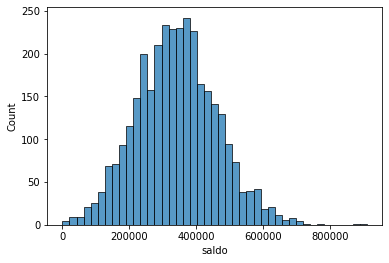

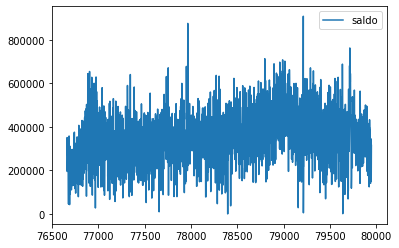

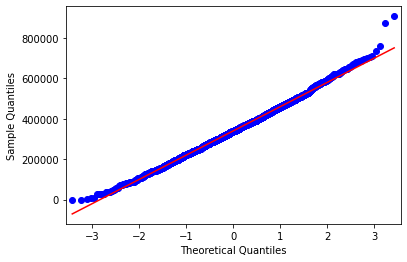

In [15]:
#@title Selecciones Agencia { run: "auto", vertical-output: true }
agencia = "LOS CEIBOS" #@param ["12 DE OCTUBRE", "LOS CEIBOS"]
columna = "egresos" #@param ["egresos", "ingresos", "saldos"]
data = df[(df['agencia'] == agencia)]
data=data[['agencia', 'saldo']]
data.head()
sns.histplot(data['saldo'])
data.plot()
qqplot(data['saldo'], line='s')
stat, p = stats.shapiro(data['saldo'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(data['saldo'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')
 

# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(data['saldo'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')



https://medium.com/spikelab/forecasting-multiples-time-series-using-prophet-in-parallel-2515abd1a245

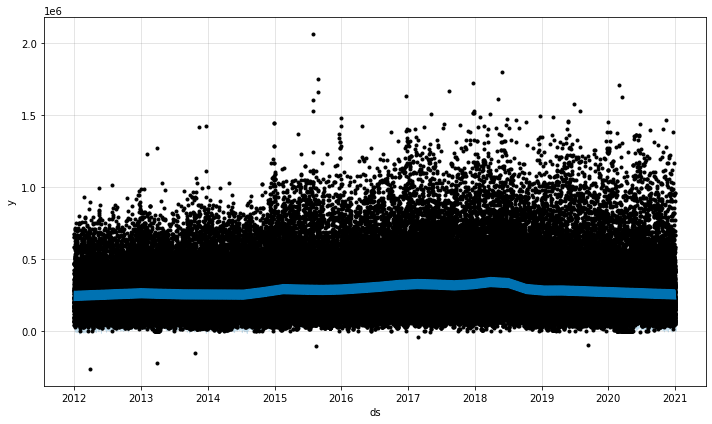

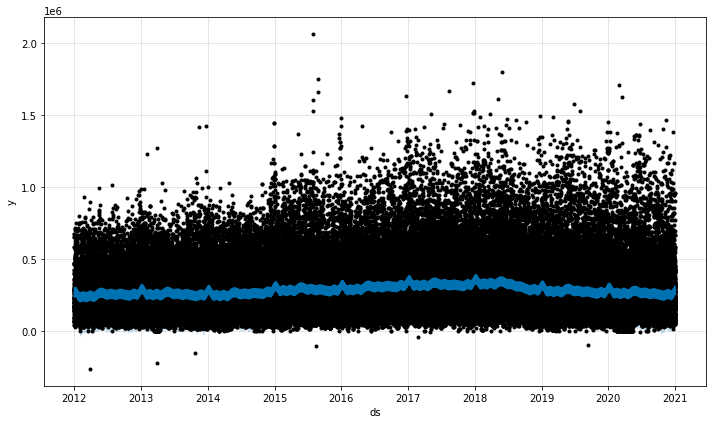

In [63]:

#@title Selecciones Agencia { run: "auto", vertical-output: true }
agencia = "12 DE OCTUBRE" #@param ["12 DE OCTUBRE", "LOS CEIBOS"]

dias = 3 #@param {type:"number"}
data = df[(df['agencia'] == agencia)]
data=data[['agencia', 'saldo']]
df=df[['fecha', 'saldo']] 
df.columns = ['ds', 'y']
df.head()
forecast=make_forecast(df,dias)
forecast2=make_forecast2(df,dias)

MAE: 134792.173 MAE2: 134276.876


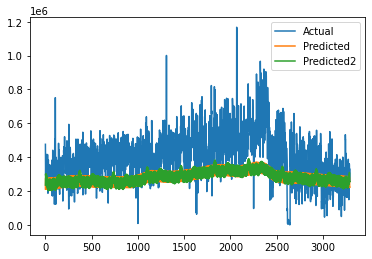

In [68]:
from sklearn.metrics import mean_absolute_error
y_true = df['y'][-3290:].values
y_pred = forecast['yhat'].values
y_pred2=forecast2['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
mae2 = mean_absolute_error(y_true, y_pred2)
print('MAE: %.3f' % mae,'MAE2: %.3f' % mae2, )
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.plot(y_pred2, label='Predicted2')
plt.legend()
plt.show()

In [69]:
stat, p = stats.shapiro(y_pred)
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal en modleo 1')
else:
	print('H1  La muestra no sigue una distribución normal en modleo 1')
stat, p = stats.shapiro(y_pred2)
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal en modleo 2')
else:
	print('H1  La muestra no sigue una distribución normal en modleo 2')

1.250198627062274e-22
H1  La muestra no sigue una distribución normal en modleo 1
1.7000386679268256e-16
H1  La muestra no sigue una distribución normal en modleo 2


In [70]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# compare samples
stat, p = mannwhitneyu(y_pred, y_pred2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=5392105.000, p=0.398
Same distribution (fail to reject H0)


https://cran.r-project.org/web/packages/prophet/prophet.pdf

https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

https://es.wikipedia.org/wiki/Error_absoluto_medio